# Machine Learning Recipes

Covers:

1. Decision Trees
2. Visualising Trees
3. K-Nearest Neighbours
4. Splitting training and testing datasets

Sidenote: If you want to visualise the decision tree, you'll need to install the following libraries. I used brew to install graphviz. I used homebrew on Mac, but you could also use a package manger on Linux:
```
brew install graphviz
pip3 install pydotplus
```

In [1]:
from sklearn import tree
features = [[140,1],[130,1],[150,0],[170,0]]
labels = [0,0,1,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

print(clf.predict([[160, 0]]))

[1]


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]


In [3]:
test_idx = [0,50,100]
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


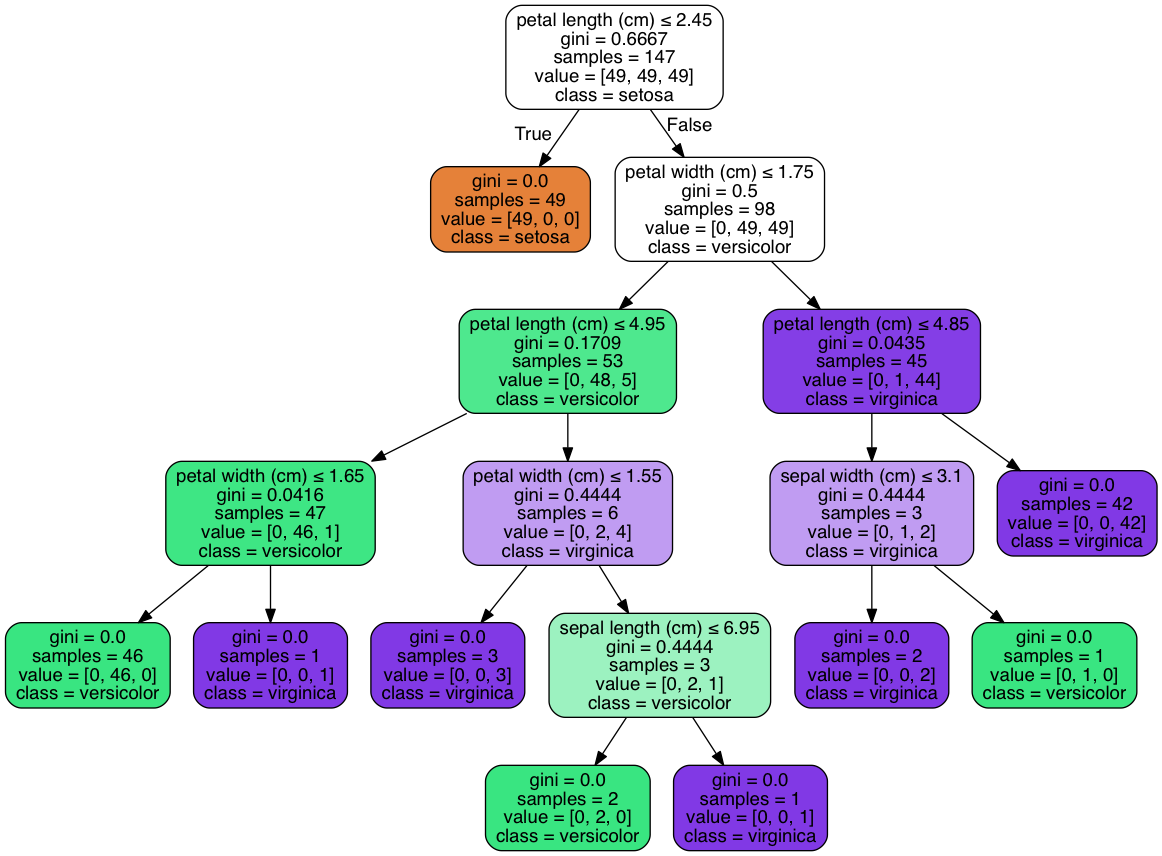

In [5]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## Features
Classifiers are only as good as the features you provide. Ideal features are:

1. Informative
2. Indpendent
3. Simple

In [6]:
from sklearn import datasets
from sklearn import tree
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(predictions)

[1 1 1 0 2 1 2 2 0 2 0 1 0 2 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 1 2 2 2 2 1 2 2
 1 2 0 2 2 0 1 1 0 0 2 2 0 1 2 1 0 1 0 2 2 1 2 2 1 2 2 2 2 2 1 1 0 0 0 2 0
 1]


In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.933333333333


In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.973333333333


## Implement KNN from scratch

In [25]:
# first randomly, so it does no better than chance
import random

class ScrappyKNN:
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions

In [26]:
clf = ScrappyKNN()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.306666666667


## Identifying Nearest Neighbour
You can find the closest points using Euclidean distance. It works regardless of how many dimensions - you can just add more terms to the equation.

## Euclidean Distance

In [34]:
x1, y1, z1 = (1,2,3)
x2, y2, z2 = (2,3,4)
e1 = (x1, y1, z1)
e2 = (x2, y2, z2)

import math
def euclidean_distance(entity1, entity2):
    summed_differences = 0
    for i, feature in enumerate(entity1):
        difference = math.pow((entity2[i] - entity1[i]), 2)
        summed_differences += difference
    return math.sqrt(summed_differences)

d = euclidean_distance(e1, e2)
print(d)

1.7320508075688772


## SciPy Euclidean Implementation

In [35]:
from scipy.spatial import distance
distance.euclidean(e1, e2)

1.7320508075688772

## k=1 implementation

In [39]:
class ScrappyKNN:
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euclidean_distance(row, self.X_train[0])
        best_index = 0
        
        for i in range(1, len(self.X_train)):
            dist = euclidean_distance(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
                
        return self.y_train[best_index]

In [40]:
clf = ScrappyKNN()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.946666666667


## KNN Pros/Cons

- Pro:
    - Simple
- Con:
    - Computationally intensive
    - Hard to represent relationships between features
    
## k=n implementation

In [74]:
class ScrappyKNN:
    def __init__(self, k=1):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        distances_idx = []
        for i in range(len(self.X_train)):
            dist = euclidean_distance(row, self.X_train[i])
            distances_idx.append((dist, i))
        distances_idx.sort()
        
        _, i = distances_idx[0]
        labels_near = {self.y_train[i]: 1}
        best_class = self.y_train[i]
        num_best_class = 1
        for i in range(1, self.k):
            dist, index = distances_idx[i]
            class_id = self.y_train[index]
            if class_id not in labels_near:
                labels_near[class_id] = 1
            else:
                labels_near[class_id] += 1
            
            if class_id == best_class:
                num_best_class += 1
            else:
                if num_best_class < labels_near[class_id]:
                    best_class = class_id
                    num_best_class = labels_near[class_id]
        return best_class

In [82]:
clf = ScrappyKNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.946666666667
